In [85]:
import numpy as np
import scipy.signal as signal
import scipy.stats as stats
import matplotlib.pyplot as plt

1.0437658019823097
1.0251948824648667
0.008
0.61


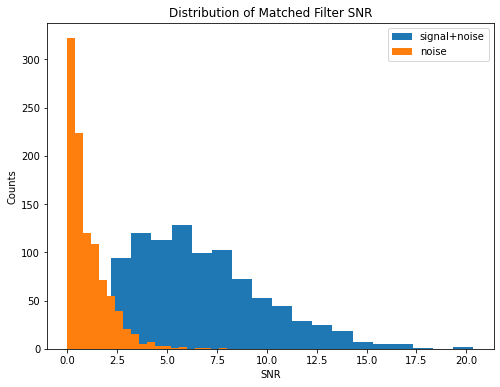

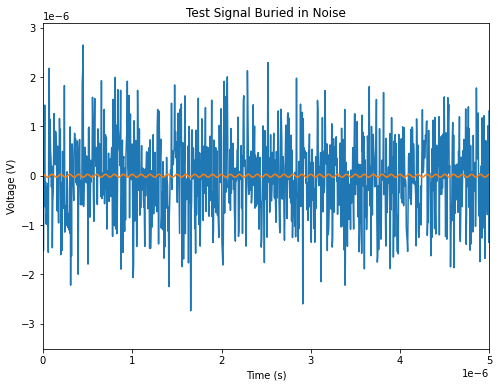

In [220]:
dt = 5e-9
time = np.arange(0,8192,1) * dt
A = 0.3e-7
var = 10 * 200e6 * 50 * 1.38e-23 
F = 10e6
#noise = np.random.normal(0, np.sqrt(var), 8192)
signal = A * np.exp(-1j * 2 * np.pi * F * time)
#y = signal + noise
h = signal * np.sqrt(1/(var * np.dot(signal.conjugate(), signal)))

trials = 1000
noise_only = []
signal_plus_noise = []

for t in range(trials):
    noise = np.random.multivariate_normal([0, 0], np.eye(2) * var/2, 8192)
    noise = noise[:, 0] + 1j * noise[:, 1]
    y = signal + noise
    noise_only.append(abs(np.dot(h.conjugate(), noise))**2)
    signal_plus_noise.append((abs(np.dot(h.conjugate(), y))**2))
    
    
print(np.mean(np.array(noise_only)))
print(np.std(np.array(noise_only)))
threshold = 5
print(len(np.argwhere(np.array(noise_only)>threshold))/len(noise_only))
print(len(np.argwhere(np.array(signal_plus_noise)>threshold))/len(signal_plus_noise))

plt.figure(figsize=(8,6))
plt.hist(np.array(signal_plus_noise), 20, label='signal+noise')
plt.hist(np.array(noise_only), 20, label='noise')
plt.title('Distribution of Matched Filter SNR')
plt.xlabel('SNR')
plt.ylabel('Counts')
plt.legend()
plt.savefig('/Users/ziegler/plots/2021323_test_MF_SNR_dist.png')



plt.figure(figsize=(8,6))
plt.plot(time, np.real(noise))
plt.plot(time, np.real(signal))
plt.xlim(time[0],time[1000])
plt.title('Test Signal Buried in Noise')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.savefig('/Users/ziegler/plots/2021323_test_signal_in_noise.png')

In [216]:
print(np.mean(np.array(signal_plus_noise)))
print(np.mean(np.array(noise_only)))

6.075364687330725
0.9817768555380959


In [217]:
stats.ttest_ind(np.array(signal_plus_noise), np.array(noise_only), equal_var=False)

Ttest_indResult(statistic=16.657571818868814, pvalue=6.844906372695766e-33)